# Prediction using Decision Tree Model on IRIS dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # importing this to load our dataset itself
from sklearn.tree import DecisionTreeClassifier, plot_tree # importing this class for classfying using Decision Tree.
from sklearn.model_selection import GridSearchCV

In [2]:
# data =load_iris() # already loads the dataset from scikit lib where we imported load_iris
data = pd.read_csv('IRIS.csv')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


data part contains all the feautures part and target is what we have to predict for our dataset.

In [4]:
# x = data.data  # we have 150 samples with 4 feautures
# y = data.target # we have only the output column.
x = data.drop(columns='species')
y = data['species']
print(x.head())
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [5]:
tree_clf = DecisionTreeClassifier() # creating a new instance of the class 

In [6]:
model = tree_clf.fit(x,y) #now fit the data into our classifier first using the method fit()

In [7]:
params = {'max_depth':[1,5,10,50], 'min_samples_split': [5,10,100,500]}
GD = GridSearchCV(tree_clf,params, cv=3, n_jobs= -1,  return_train_score=True,verbose=10)
result = GD.fit(x,y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1756s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0248s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0394s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.8s finished


In [8]:
print('Score is :- ',result.best_score_)
print('Best params :- ',result.best_params_)

Score is :-  0.9666666666666667
Best params :-  {'max_depth': 5, 'min_samples_split': 5}


In [9]:
import graphviz # through this we can render the data to make it a creative pdf file used for visualization purpose
from sklearn.tree import export_graphviz

In [10]:
features = list(x.columns.values)

In [11]:
dot_data = export_graphviz(tree_clf,out_file=None,feature_names=features,class_names='target',filled =True,rounded=True,special_characters=True)
#it will create a dot

In [13]:
graph = graphviz.Source(dot_data)

In [14]:
graph.render("data") # it will ask you for the file name, it will create the file in the same folder


'data.pdf'

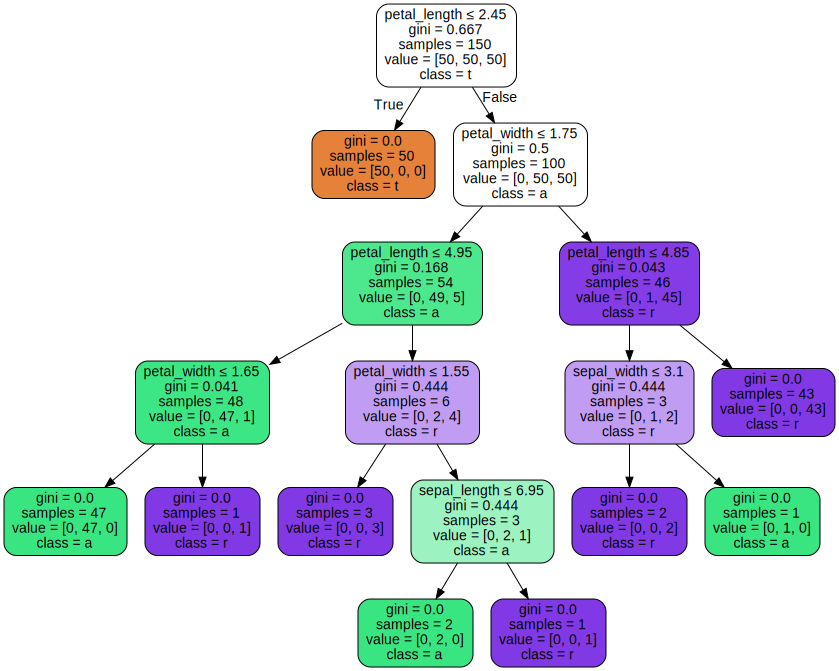

In [15]:
graph

In [16]:
prob = tree_clf.predict_proba([[7, 3.3 , 4.5, 1.5]])

In [17]:
print(prob)

[[0. 1. 0.]]
